EECE454 - Introduction to Machine Learning System

# PA1-2: Logistic Regression & Clustering

made by Minkyu Kim, revised by Minjae Park


In this exercise, you need to implement Logistic regression.

Before starting this programming exercise, we strongly recommend to review the lecture notes used in this course.

To get started with the exercise, you need to download the dataset zip file and unzip its contents to the following directory: /content/drive/MyDrive/PA1/datasets

If you have any questions, please send a mail to TA(mjae.park@postech.ac.kr)

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/PA1/datasets

# Instructions

This file contains codes that help you get started on the logistic regression exercise. In this PA, you study how to implement Linear classifier.
You need to complete the following parts (check the context list on the left side) of this exercise

Logistic Regression
* Plot Data
* Cost Function
* Gradient Descent
* Prediction

You do not need to change any code that "YOUR CODE HERE" does not exist.

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.

# Logistic Regression
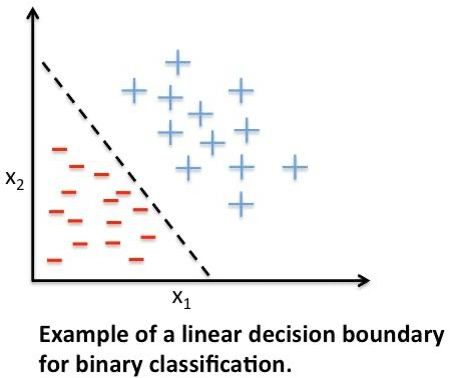

In this part of the exercise, You build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.

You have historical data from previous applicants that you can use as a training set for logistic regression.

Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

## Data Load

The file contains the dataset for our logistic regression problem. In this section, we use radius and texture for decide this cancer is malignant or not.

This section contains data loading implementation.
There is no "YOUR CODE HERE" block in this section.

In [ ]:
from ucimlrepo import fetch_ucirepo 
import torch

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X_df = breast_cancer_wisconsin_diagnostic.data.features 
y_df = breast_cancer_wisconsin_diagnostic.data.targets 


X_list = X_df[['radius1','texture1']].values.tolist()
y_df['Diagnosis'] = y_df['Diagnosis'].map({'B': 0, 'M': 1})
y_list = y_df['Diagnosis'].values.tolist()

origin_X = torch.FloatTensor(X_list)
y = torch.FloatTensor(y_list).unsqueeze(-1)

print("origin_X shape : ", origin_X.size())
print("origin_y shape : ", y.size())

## K-means clustering

Before implementing logistic regression, try applying K-means clustering and Gaussian Mixture Models using the EM algorithm on the given origin_X dataset.

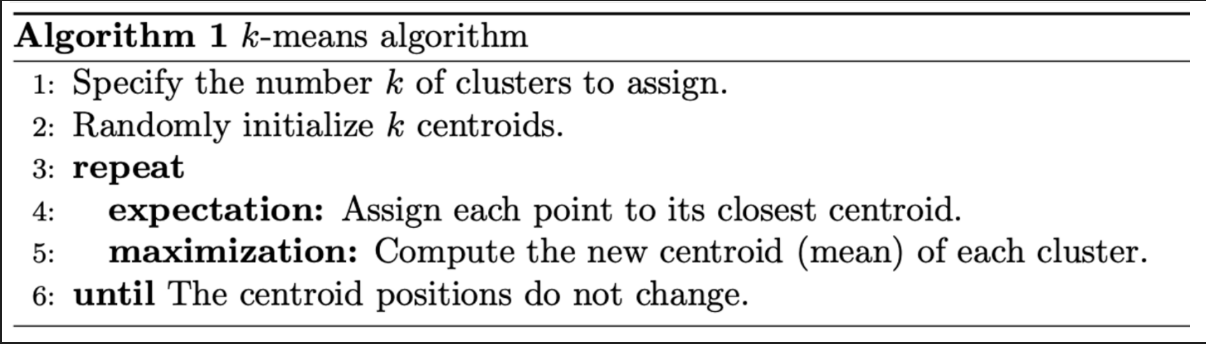

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# origin_X shape :  torch.Size([569, 2])
def k_means(X, K, num_iters=100):
    N = X.size(0)
    # randomly choose the initial center points of cluster
    torch.manual_seed(0)
    centroids = X[torch.randperm(N)[:K]]

    # ====================== YOUR CODE HERE ====================================
    #  Instructions: Fill in this function to return the optimal centroids and cluster_assignments
    #  Notice: You must not use KMeans function from scikit-learn module. Do it on your own!
    #  Hint: use torch.cdist(), torch.argmin() for calculating distance and decide cluster.
    #  Hint: use torch.allclose for detecting changes from previous centroids.
    # ==========================================================================
    return centroids, cluster_assignments

Your visualized data look like the graph below: <br>

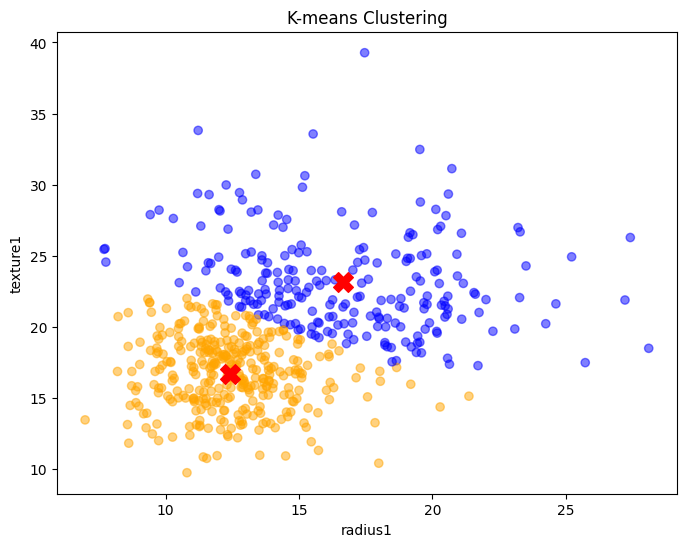

In [ ]:
K = 2
centroids, cluster_assignments = k_means(origin_X, K)

print("Final centroids:")
print(centroids)

print('Expected centroids (approx):\n [12.4232, 16.6911]\n [16.6573, 23.1477]\n')
plt.figure(figsize=(8,6))
colors = ['orange' if label == 0 else 'blue' for label in cluster_assignments]
plt.scatter(origin_X[:, 0], origin_X[:, 1], c=colors, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.xlabel('radius1')
plt.ylabel('texture1')
plt.title('K-means Clustering')
plt.show()

## Gaussian Mixture Model density estimation using Expectation Maximization 

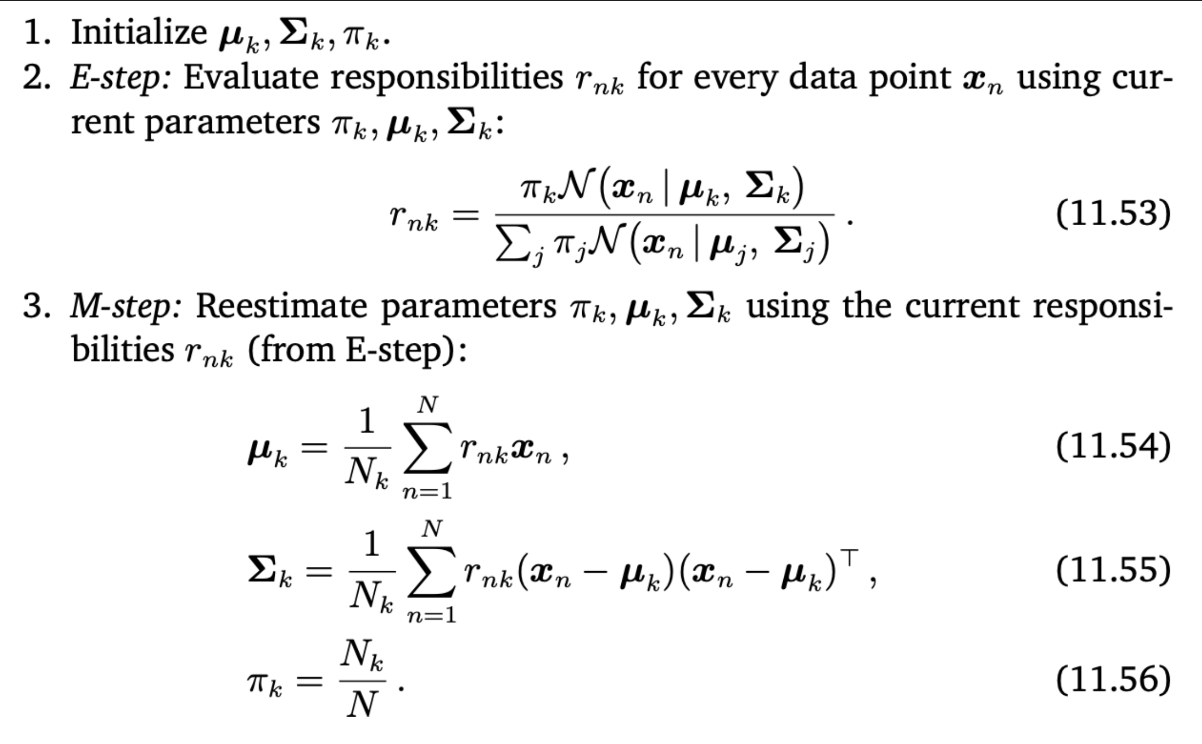

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def gmm_em(X, K, num_iters=100):
    N, D = X.size()
    
    # initialization
    torch.manual_seed(0)
    means = X[torch.randperm(N)[:K]]  # (K, D)
    covariances = torch.stack([torch.eye(D) for _ in range(K)])  # (K, D, D)
    weights = torch.ones(K) / K  # (K,)
    
    eps = 1e-6  
    # ====================== YOUR CODE HERE ====================================
    # Instructions: Complete the gmm_em function to return the optimal centroids and cluster_assignments.
    # 
    # - Use K-means clustering or Gaussian Mixture Models (GMM) on the EM algorithm as initialization for the centroids if needed.
    # - Utilize the torch.distributions.MultivariateNormal function to calculate the Gaussian probability density. For more details, refer to PyTorch documentation or online resources.
    # - During the E-step, assign log-responsibilities using the log-probabilities to avoid numerical underflow.
    # 
    # Hints:
    # - eps is a small constant used to ensure the covariance matrix is positive-definite. This helps stabilize inverse matrix calculations.
    # - In the M-step, update weights, means, and covariances based on the current responsibilities.
    # - To avoid division by zero or instability, consider adding a small epsilon (eps) when calculating parameters. (calculating covariances and (log)responsibility)
    # =========================================================================
    return means, covariances, weights, cluster_assignments

Your visualized data look like the graph below: <br>

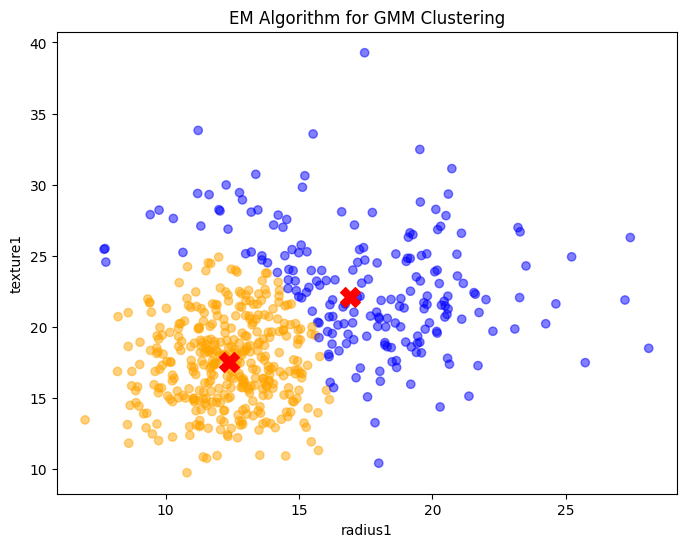

## Plot Data
Before implementing any learning algorithm, it is always good to visualize the data if possible.

The code displays it on a 2-dimensional plot by calling the function plotData.

You need to complete the code in plotData to display like the figure below, where the axes are age and salary, and the positive and negative examples are shown with different markers.

Your visualized data look like the graph below:

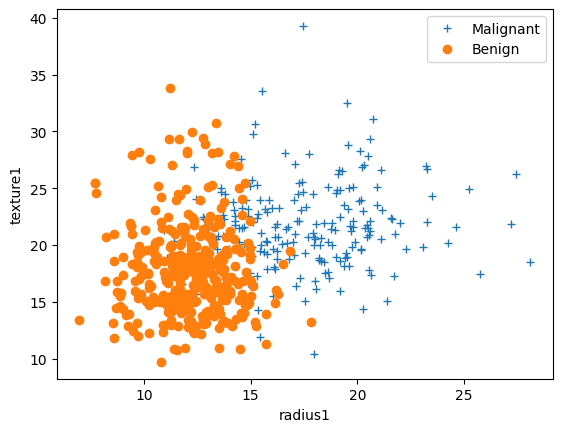

In [ ]:
import matplotlib.pyplot as plt
def plotData(X, y):
    #plotData plots the data points X and y into a new figure
    #   plotData(x,y) plots the data points with + for the positive examples
    #   and o for the negative examples. X is assumed to be a Mx2 matrix.

    # ====================== YOUR CODE HERE ======================
    # Instructions: Plot the training data into a figure using the
    #               "plt.figure" and "plt.scatter" commands. Set the axes labels using
    #               the "plt.xlabel" and "plt.ylabel" commands.
    #
    #
    # Hint: Plot the positive and negative examples on a
    #       2D plot, using the option marker='+' for the positive
    #       examples and marker='o' for the negative examples.
    #       We recommend using numpy.where for conditional indexing.
    #       + If you try to find the index of x that is conditioned on y, try to use y[:,0] (not y)
    # =========================================================================

In [ ]:
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n')
plotData(origin_X, y)

## Cost Function

Before you start with the actual cost function, Your first step is **to implement *sigmoid* function** so it can be
called by the rest of your program.

When you are finished, try testing a few values by calling sigmoid(X).

For large positive values of X, the sigmoid becomes close to 1, while for large negative values, the sigmoid become close to 0.

Evaluating sigmoid(0) gives you exactly 0.5.

**Your code also has to work with vectors and matrices.**

**For a matrix, your function needs to perform the *sigmoid* function on every element.**

Recall that the logistic regression hypothesis is defined as: $h_\theta(x) = \sigma(\theta^{\top}x)$, where function $\sigma$ is the sigmoid function.

The sigmoid function is defined as: $\sigma(z) = \frac{1}{1+e^{-z}}$

After that, you are supposed to implement the cost function and gradient for logistic regression. Complete *costFunction* to return the cost and gradient. Recall that the cost function in logistic regression is: $J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\log h_\theta(x^{(i)}) + (1-y^{(i)})\log\left(1-h_\theta(x^{(i)})\right)\right]$<br>

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0, 1, . . . , n$) is defined as follows:<br> $\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$. Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

In [ ]:
def sigmoid(X):
  # ====================== YOUR CODE HERE ======================
  # ============================================================
  return output

In [ ]:
def costFunction(theta, X, y):

    #costFunction Compute cost and gradient for logistic regression
    #   J, grad = costFunction(theta, X, y) computes the cost of using theta as the
    #   parameter for logistic regression and the gradient of the cost
    #   w.r.t. to the parameters.

    # Initialize some useful values

    # Add intercept term to x and X_test
    m = X.shape[0] # number of training examples

    # You need to return the following variables correctly
    J = 0
    grad = torch.zeros_like(theta)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta.
    #               You must not use for loop to compute cost function.
    #               Instead, use a fully vectorized form.
    #               The code used for loop would not be given any points.
    #
    # Note: grad should have the same dimensions as theta
    #
    # =============================================================

    return J, grad

In [ ]:
#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = origin_X.shape

# append bias
X = torch.cat((torch.ones(m, 1), origin_X) , dim=1)

# Initialize fitting parameters
initial_theta = torch.zeros(n + 1, 1)

# Compute and display initial cost and gradient

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): ', cost, '\n')
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print(grad, '\n')
print('Expected gradients (approx):\n 0.1274\n 0.5573\n 1.5952\n')

# Compute and display cost and gradient with non-zero theta
test_theta = torch.Tensor([-24, 0.2, 0.2]).unsqueeze(-1)
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: ', cost, '\n')
print('Expected cost (approx): 6.0308\n')
print('Gradient at test theta: \n')
print(grad, '\n')
print('Expected gradients (approx):\n -0.3726\n -6.5064\n -8.0496\n')

## Gradient Descent
In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradient descent. You wrote a cost function, calculated its gradient, and then took a gradient descent step accordingly.<br>

As you did previously, Implement gradient descent. The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration.

In [ ]:
from tqdm import tqdm
def gradientDescent(X, y, theta, alpha, num_iters):
  #gradientDescent Performs gradient descent to learn theta
  #   theta, J_history = gradientDescent(X, y, theta, alpha, num_iters) updates theta by
  #   taking num_iters gradient steps with learning rate alpha

  # Initialize some useful values
  m = y.size(0)  # number of training examples
  J_history = torch.zeros(num_iters,1)

  for idx in tqdm(range(num_iters)):
    grad = torch.zeros_like(theta)
    # ====================== YOUR CODE HERE ======================
    # Instructions: Perform a single gradient step on the parameter vector
    #               theta.
    #               Use costFunction's return values for updating theta.
    #
    # Hint: While debugging, it can be useful to print out the values
    #       of the cost function (costFunction) and gradient here.
    #
    # ============================================================
  return theta, J_history

In [ ]:
print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta = torch.zeros(3,1).type(torch.FloatTensor) # initialize fitting parameters
alpha = 0.001
iterations = 500000
print(X.size(), y.size())
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:\n')
print(theta, '\n')

print('Expected theta value : \n[-11.2099   0.6232   0.0952]')

The plots look something like figure below:

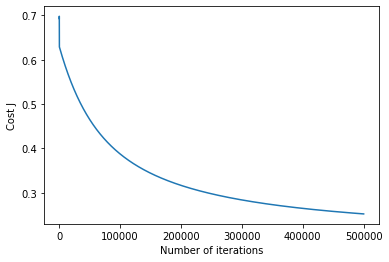

In [ ]:
# Plot the convergence graph
num_iters = 500000
plt.figure()
plt.plot(range(num_iters), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

## Linear Decision Boundary
One way to evaluate the quality of the parameters we have found
is to see how well the learned model predicts on our training set.

In [ ]:
def plotLinearDecisionBoundary(theta, X, y):
    #plotLinearDecisionBoundary Plots the data points X and y into a new figure with
    #   the decision boundary defined by theta
    #   plotLinearDecisionBoundary(theta, X,y) plots the data points with + for the
    #   positive examples and o for the negative examples. X is assumed to be
    #   a either
    #   Mx3 matrix, where the first column is an all-ones column for the
    #   intercept.

    # append bias
    if X.shape[1] <= 2:
      X = torch.cat((torch.ones(m, 1), X), dim=1)

    # Plot Data
    plt.figure()

    # Only need 2 points to define a line, so choose two endpoints
    plot_x = torch.Tensor([X[:,1].min() - 2, X[:,1].max() + 2])
    # Calculate the decision boundary line
    plot_y = torch.Tensor((-1/theta[2])*(theta[1]*plot_x + theta[0]))
    # Plot, and adjust axes for better viewing

    plt.plot(plot_x, plot_y, color='C0')

    # ====================== YOUR CODE HERE ======================
    # Instruction : plot the figures that is same to below things.
    # Hint : use plt.legend() nad use y[:,0] rather than y
    # ============================================================

The plots look something like a figure below

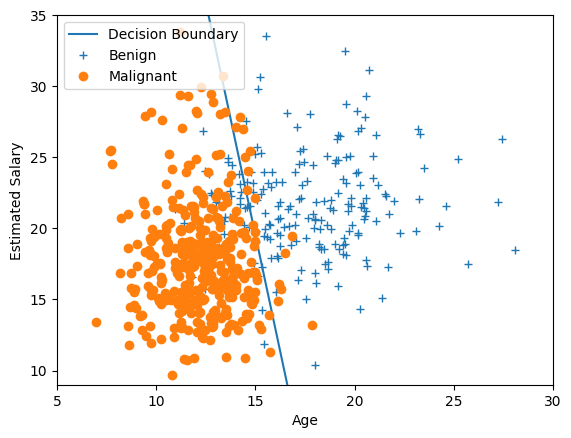

In [ ]:
# Plot Boundary
plotLinearDecisionBoundary(theta, X, y)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

### Check the loss when the model get unseen data as input

In [ ]:
# It's important to show good performance when the model process unseen data
# Therefore, We check the loss when the model meets unseen data by using the part of X_train
# Instructions: split dataset(X and y) into 90 and 10.
# 90 pairs of (X, y) are used to train, then remaining 10 pairs are used to evaluate the loss.
from tqdm import tqdm
import torch

def gradientDescent_ver2(X_train, y_train, X_unseen, y_unseen, theta, alpha, iterations) :
  # Initialize some useful values
  m = y_train.size(0)  # number of training examples
  m_unseen = y_unseen.size(0)
  J_history = torch.zeros(iterations,1)

  for idx in tqdm(range(iterations)):
    grad = torch.zeros_like(theta)
    # ====================== YOUR CODE HERE ======================
    # Instructions: Perform a single gradient step on the parameter vector
    #               theta.
    #               Use costFunction's return values for updating theta.
    #
    # Hint: While debugging, it can be useful to print out the values
    #       of the cost function (costFunction) and gradient here.
    #
    # ============================================================
  return theta, J_history

theta_2 = torch.zeros(3,1).type(torch.FloatTensor) # initialize fitting parameters
alpha_2 = 0.001
iterations_2 = 500000
print(X.size(), y.size())
# ====================== Fill the blank parts ======================
X_train = # blank
X_unseen = # blank

y_train = # blank
y_unseen = # blank

print(X_train.size(), y_train.size())
print(X_unseen.size(), y_unseen.size())
# ============================================================

theta_2, J_unseen_history = gradientDescent_ver2(X_train, y_train, X_unseen, y_unseen, theta_2, alpha_2, iterations_2)

print(theta_2, '\n')
print('Expected theta value : \n[-11.3874   0.6073   0.1204]')

The plots look something like figure below: <br>

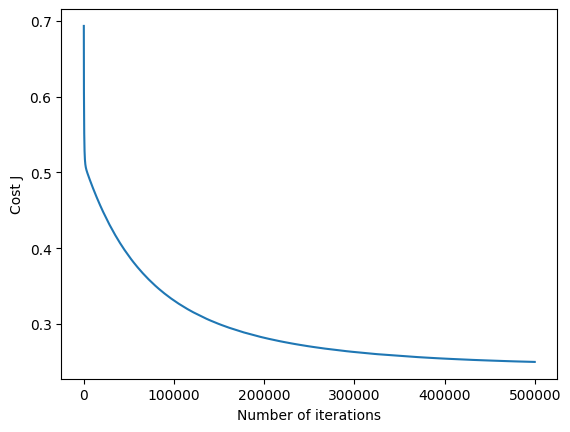

## Optimizer

Instead of taking gradient descent steps, Use a python framework called *scipy.optimize*.<br>

*scipy.optimize* is an optimization solver that finds the minimum scalar function of one or more variables.

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.

Concretely, you are going to use *scipy.optimize* to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values).

You only needed to provide a function calculating the cost and the gradient.

The cost is supposed to be about 0.203.

In [ ]:
# To use scipy module, you re-implement functions that are used to compute cost & gradient by using numpy (because scipy mudule not works with PyTorch)
# Therefore, you need to re-implement following functions (by using numpy)
# Hint : See 'NumPy documentation'(https://numpy.org/doc/stable/)
import numpy as np
def sigmoid_for_optimize(X):
  # ====================== YOUR CODE HERE ======================

  # ============================================================
  return output

def costFunction_for_optimize(theta, X, y) :
    # ====================== YOUR CODE HERE ======================
    # Instructions: Re-implement the costFunction that avoids the TypeError
    # =============================================================

    return J, grad


In [ ]:
import scipy.optimize as op
import numpy as np

print ('Executing minimize function...\n')

initial_theta = np.array([0,0,0])
result = op.minimize(fun=costFunction_for_optimize,x0=initial_theta, args=(X.numpy(),y.numpy()), jac=True, options={'maxiter':1000})
#  reference : https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

J = result.fun
theta = result.x

print('Cost at theta found : \n', J, '\n')
print('Expected cost (approx): 0.0.256\n')
print('theta: \n', theta, '\n')
print('Expected theta (approx):\n')
print(' -19.85\n 1.06\n 0.22\n')

## Prediction
After learning the parameters, Use the model to predict whether a cancer is Malignant or not

<!-- For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of **0.776**. **your task is to complete the code in *predict* function.** -->

The *predict* function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$.

After you have completed the code in *predict* function, it will report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [ ]:
# Before prediction, you need to convert theta to torch.Tensor
theta = torch.from_numpy(theta).unsqueeze(-1)

In [ ]:
def predict(theta, X):

    #predict predicts whether the label is 0 or 1 using learned logistic
    #regression parameters theta
    #   p = predict(theta, X) computes the predictions for X using a
    #   threshold at 0.5 (i.e., if sigmoid(h(x)) >= 0.5, predict 1)

    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = torch.zeros(m, 1)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the following code to make predictions using
    #               your learned logistic regression parameters.
    #               You should set p to a vector of 0's and 1's
    #
    # =========================================================================

    return p

In [ ]:
#  After learning the parameters, you'll like to use it to predict the outcomes
#  on unseen data. In this part, you will use the logistic regression model to predict the probability.
#
#  Furthermore, you will compute the training and test set accuracies of
#  our model trained by optimizer.
#
#  Probability of Malignancy for a cancer with radius 15 and texture 20
# ====================== YOUR CODE HERE ======================
# Instructions: Complete "prob" variable for a cancer with radius 15 and texture 20

# =========================================================================
print('For a cancer with radius 15 and texture 20, we predict an Malignancy probability of ', prob.item())
print('Expected value: 0.591\n\n')
# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: ', torch.mean((p == y).type(torch.FloatTensor)) * 100, '\n')
print('Expected accuracy (approx): 89.1\n')

# Optional
 In this part, you are given a dataset with data points that are not
 linearly separable. However, you would still like to use logistic
 regression to classify the data points. To do so, you introduce more features to use. In particular, you add polynomial features to our data matrix (similar to polynomial regression).

## A dataset with linearly inseparable data points

In this part of the exercise, you may try to implement regularized logistic regression to predict whether microchips from a fabrication plant pass quality assurance (QA).

During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and have the
test results for some microchips on two different tests.

You would like to determine whether the microchips should be accepted or rejected from these two tests.

To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

Similar to the previous parts of this exercise, *plotData* is used to generate a figure, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.<br>

Your visualized data look like the graph below:

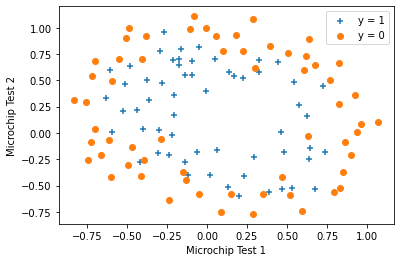

This Figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot.

Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

Logistic regression with regularization using high-dimensional features help find a non-linear decision boundary:<br>
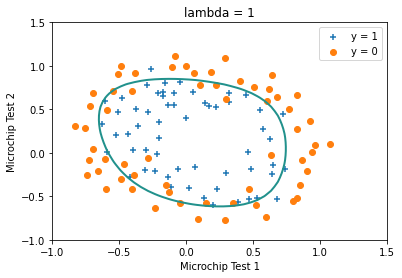

## Cost Function with regularization terms
It would help if you used the cost function and gradient for regularized logistic regression.<br>

Recall that the regularized cost function in logistic regression is:

$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log h_\theta(x^{(i)}) - (1-y^{(i)})\log\left(1-h_\theta(x^{(i)})\right)\right]+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^{2}.$<br>


The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$\frac{\partial J(\theta)}{\partial \theta_j} = \left[\frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}\right]+\frac{\lambda}{m}\theta_j$ $\quad$ for $j \geq 1$<br>


Notice that indexing starts from 1. Don't regularize the parameter corresponding to $\theta_0$.<br>

The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:<br>
$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$ $\quad$ for $j = 0$<br>


## Overfitting & Underfitting
In this part of the exercise, you try out different regularization parameters for the dataset to understand how regularization prevents overfitting.

Notice the changes in the decision boundary as you vary $\lambda$.<br>

**With a small $\lambda$**, you should find that the classifier gets almost every training example correct but draws a very complicated boundary, thus **overfitting** the data. This highly complex boundary is not a reasonable decision boundary.

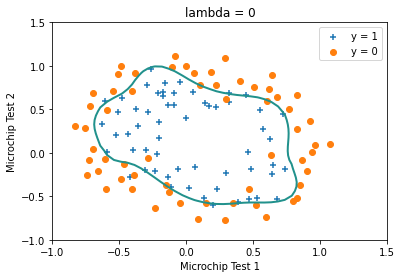

**With a larger $\lambda$**, you should see a plot showing a simpler decision boundary that still separates the positives and negatives fairly well.

However, if $\lambda$ is set to too high a value(here, $\lambda = 100$), you will not get a good fit, and the decision boundary will not follow the data so well, thus **underfitting** the data.

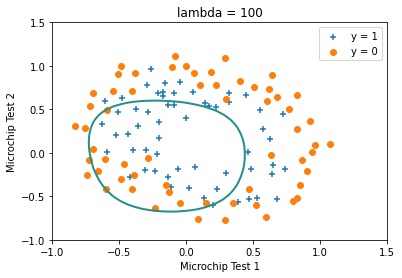

# Think about

- Why do we use the sigmoid function? Can we use another one?

- Why do we add polynomial features for non-linear classification?

- Describe how overfitting or underfitting is caused according to the value of the regularization term's coefficient lambda in qualitative ways.

Your answer: